In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import configparser

In [92]:
path = '/home/tester/Desktop/PRISCI/FL-IDS/priscilla/results/'

MODE = 'fl_AM' #fl
RUN_NAME = 'F2'
#PRINT_SCR
#BALANCE_DATA
#TRAIN_SIZE
#TEST_SIZE

path = path + MODE + '/' + RUN_NAME + '/'

In [93]:
stats = pd.read_csv(path + 'stats.txt', sep='\s+')
tr_loss = pd.read_csv(path + 'tr_loss.txt', sep='\s+', header = None).values[0]
val_loss = pd.read_csv(path + 'val_loss.txt', sep='\s+', header = None).values[0]

In [94]:
cl_id = stats['CL_ID'].values
ds_sizes = stats['TRAIN_DS_SIZE'].values
accuracies = stats['ACC'].values
prcsn = stats['PREC'].values
rcl = stats['RCL'].values
f1 = stats['F1'].values
roc = stats['ROC'].values

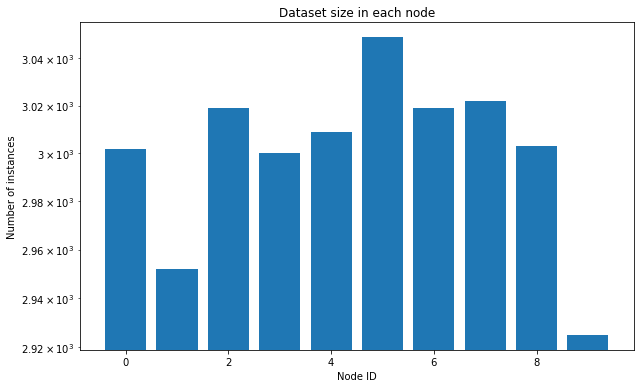

In [95]:
plt.bar(x = cl_id, height=ds_sizes, log = True)
plt.title('Dataset size in each node')
plt.xlabel('Node ID')
plt.ylabel('Number of instances')
plt.show()

Text(0, 0.5, 'Loss')

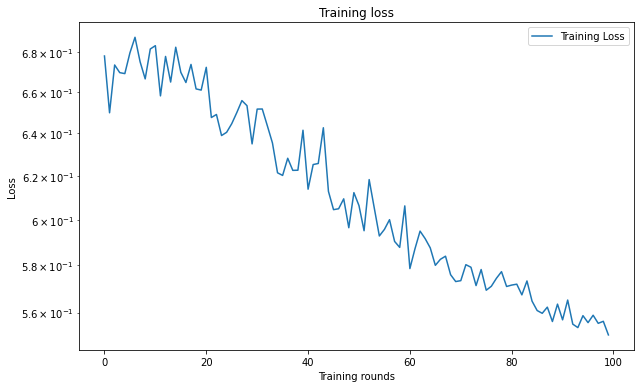

In [96]:
plt.plot(tr_loss, label="Training Loss")
plt.yscale('log')
plt.legend()
plt.title('Training loss')
plt.xlabel("Training rounds")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

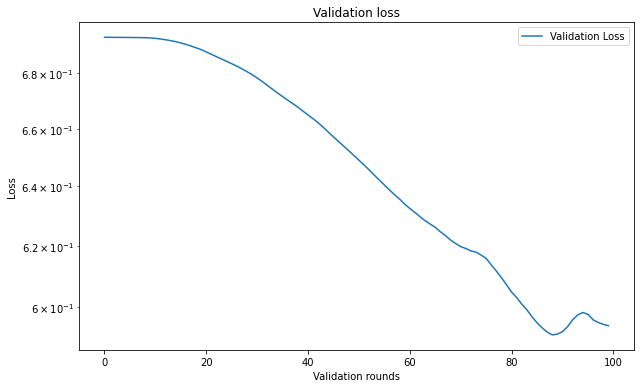

In [97]:
#500/4 times evaluated
plt.plot(val_loss, label="Validation Loss")
plt.yscale('log')
plt.legend()
plt.title('Validation loss')
plt.xlabel("Validation rounds")
plt.ylabel("Loss")

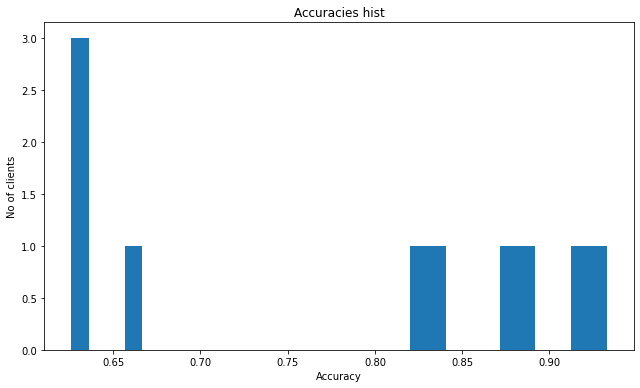

In [98]:
#Print accuracies
plt.hist(accuracies, bins=30)
plt.title('Accuracies hist')
plt.xlabel("Accuracy")
plt.ylabel("No of clients")
plt.show()

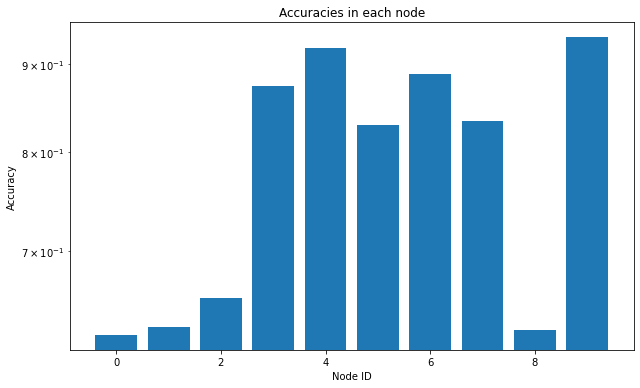

In [99]:
plt.bar(x = cl_id, height=accuracies, log = True)
plt.title('Accuracies in each node')
plt.xlabel('Node ID')
plt.ylabel('Accuracy')
plt.show()

In [100]:
print(np.median(accuracies))

0.83165


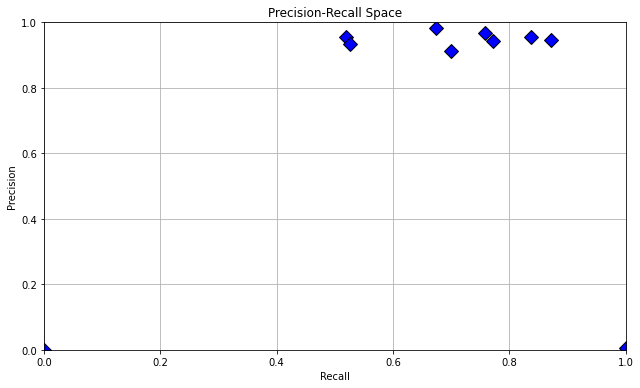

In [101]:
plt.rcParams["figure.figsize"] = [9.00, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
for i in range(0,len(cl_id)):
    x = prcsn[i]
    y = rcl[i]
    plt.plot(x, y, marker="D", markersize=10, markeredgecolor="black", markerfacecolor="blue")
plt.title('Precision-Recall Space')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()